# Lecture 05 - Support Vector Machines & Random Forest models
 
1. Hard Margin SVMs
    1. Margin
    2. Optimization problem
2. Kernel Trick 
    1. Slater's condition
    2. From the Primal to the Dual problem
3. Soft Margin SVMs
4. Random Forest 
 
[한국어 자료](http://hleecaster.com/ml-svm-concept/)

## 1. Hard Margin SVM

Assume linearly seperable data $\{(x_1,y_1),...,(x_n,y_n) \}$.

- $y_i \in \{-1,1\}$
- $x_i \in \mathbb{R}^d$
 
```python
def abline(slope, intercept, x_vals=None, label=''):
    """Plot a line from slope and intercept"""
    if x_vals is None:
    axes = plt.gca()
    # print(axes.get_xlim())
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label=label)
```

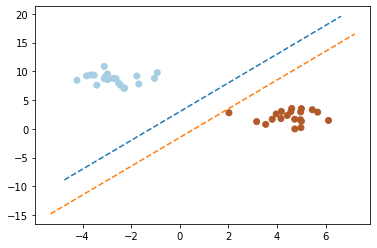

In [4]:
# create and visualize data for linearly seperable problem
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

d=2
X, y = make_blobs(n_samples=40, centers=2, n_features=d, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)

# plot possible decision boundaries
from utils import abline
abline(slope=2.5, intercept=3, label='line1')
abline(slope=2.5, intercept=-1.5, label='line2')

In [3]:
# %load utils.py
# import한 utils 파일을 보고 싶다면

### 1.1 Margin
---
***What is the margin?***

1. Recall the definition of a hyperplane: $\{x: w^Tx + b = 0\}$, 
and show that $w$ is a normal vector
2. Compute the distance d of a point x to the hyperplane


### $\{x: w^Tx + b = 0\}$
---

#### 1. Show $w$ is normal to $\{x: w^Tx + b = 0\}$.

For two points $x_1, x_2$ on the hyperplane, we have 

$ w^Tx_1 + b =  w^Tx_2 + b = 0$ 

$\implies w^T(x_1 - x_2) = 0 \implies w\perp(x_1 - x_2)$.

#### 2. Compute distance $d$ of some point $x\in\mathbb{R}^d$ to the hyperplane $\{x: w^Tx + b = 0\}$

#### 2. Compute distance $d$ of $x$ to the hyperplane $\{x: w^Tx + b = 0\}$

Because $w\perp(x_1 - x_2)$, we can compute the distance of a new point $x$ to the hyperplane, by
1. picking any point $\hat{x}$ on the hyperplane
2. computing $\hat{x} - x$,
3. projecting this difference onto the normal vector: $w^T(\hat{x} - x)$
4. normalize by $\lVert w\rVert$

#### So far
For a labelled datapoint $(x_i, y_i)$, and its distance $d$ to the hyperplane, we have:

 - $d \propto w^T(x_i-x) = w^Tx_i-w^Tx= w^Tx_i + b$
 
BUT: $w$ could have any length, so to get the actual value of $d$, we normalize:
 
 - $d = \frac{w^Tx_i + b}{\lVert w\rVert}$
 
And to remove the sign, we can compute
 - $|d| = d_iy_i$, $y_i\in\{-1,1\}$

***What is the margin?***

  - margin = $min\{d_iy_i\}$
 
Placing it 'in the middle' will give symmetric minimum distance to support vectors.
 
 ## The (linear) SVM is a type of linear classifier, that uses the notion of a margin to compute its loss/error function!

### 1.2 Hard margin SVM Objective function 

***Goal: Maximize the margin $min\{d_iy_i\}$***

We observe two things:
 1. $min\{d_iy_i\} = min\{\frac{y_i(w^Tx_i + b)\}}{\left|w\right|}\}$ 
 2. For all points not on the margin, we have $y_i(w^Tx_i + b) \geq C$ for some $C\in\mathbb{R}$.

Now, require that support vectors satisfy $y_i(w^Tx_i + b) = 1$, i.e. only use appropiately scaled version of $w$. Then

 - **margin = $min\{\frac{y_i(w^Tx_i + b)\}}{\lVert w\rVert}\}$ =  $\frac{1}{\lVert w\rVert}$**

Note: $max \frac{1}{\lVert w\rVert} \leftrightarrow min \lVert w\rVert \leftrightarrow min \frac{1}{2}\lVert w\rVert^2$

See https://web.mit.edu/zoya/www/SVM.pdf for an alternative derivation of the minimization objective.

For any $w,b$ satisfying the inequalities $y_i(w^Tx_i + b) \geq C$, any positively scaled version (e.g. by $\frac{1}{C}$) satisfies them too.

Now, require that $y_i(w^Tx_i + b) = 1$ for the closest points $x_i$, i.e. let their unnormalized distance be equal to 1. Then, since
 - $min\{\frac{y_i(w^Tx_i + b)\}}{\lVert w\rVert}\} =  \frac{1}{\lVert w\rVert}min\{y_i(w^Tx_i + b)\} $
we have
 - $margin =  \frac{1}{\lVert w\rVert}$

Note: $max \frac{1}{\lVert w\rVert} \leftrightarrow min \lVert w\rVert \leftrightarrow min \frac{1}{2}\lVert w\rVert^2$

See https://web.mit.edu/zoya/www/SVM.pdf for an alternative derivation of the minimization objective.

- Minimize $\frac{1}{2}\lVert w\rVert^2$ 
- subject to the constraints $y_i(w^Tx_i + b) \geq 1$ for all $i,...,N$
- Once the parameters have been optimized, the decision function is given by $f(x) = sign(w^Tx + b)$ and it can be applied to classify new data.

```python
def plot_svm(X, y, clf):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)  # {ndarray: (30,)}
    yy = np.linspace(ylim[0], ylim[1], 30)  # {ndarray: (30,)}
    YY, XX = np.meshgrid(yy, xx)  # {ndarray: (30,30)}, {ndarray: (30,30)}
    xy = np.vstack([XX.ravel(), YY.ravel()]).T  # # {ndarray: (900, 2)},
    Z = clf.decision_function(xy).reshape(XX.shape)  # {ndarray: (30,30)}

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
    plt.show()
```

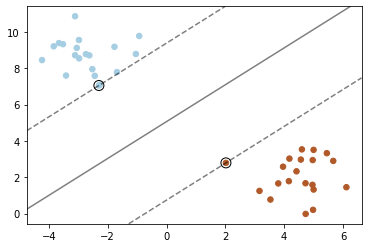

[-1.61777826]
[2.1116324]


In [5]:
# plot hard margin svm example
from utils import plot_svm
from sklearn import svm
d=2
X, y = make_blobs(n_samples=40, centers=2, n_features=d, random_state=42)
# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)
plot_svm(X,y,clf)
# make prediction using decision function
print(clf.decision_function([[-4, 8]]))
print(clf.decision_function([[4, 0]]))

## 2. Kernel Trick

**What about data that is not linearly separable?**

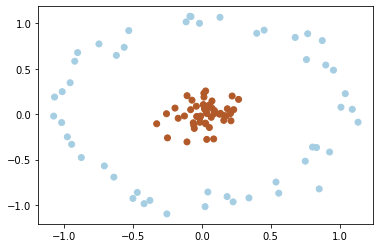

In [6]:
# plot non linearly separable data
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)

What happens if we transform the data using
 - $\Phi: \mathbb{R}^2\rightarrow \mathbb{R}^3$ given by the map

$(x_1, x_2)\mapsto (z_1,z_2,z_3) =: (x_1^2, \sqrt{2}x_1x_2, x_2^2)$?

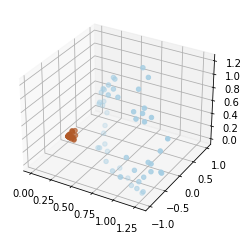

In [7]:
#transform data using an extra dimension z
xs = X[:,0]**2
ys = X[:,0] * X[:,1] *2**.5
zs = X[:,1]**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xs, ys, zs, c=y, cmap=plt.cm.Paired, zdir='x')

### From Linear to Nonlinear models

Apply a fixed nonlinear feature map $\Phi : \mathbb{R}^d \rightarrow \mathbb{R}^D$ to the data, and learn a linear model in the image domain:

 - $f(x) = w^T\Phi(x) + b$

In our example we had $\Phi: \mathbb{R}^2\rightarrow \mathbb{R}^3$ given by the map

$(x_1, x_2)\mapsto (z_1,z_2,z_3) =: (x_1^2, \sqrt{2}x_1x_2, x_2^2)$

Computing $\Phi(x)$ can become intractable! Consider a function $k: \mathbb{R}^d \times \mathbb{R}^d \rightarrow \mathbb{R}$, s.t.

 - $\langle \Phi(x),\Phi(x') \rangle =: k(x,x')$

If we can build a model that only uses dotproducts $\langle \Phi(x),\Phi(x')\rangle$, we do not have to compute $\Phi(x)$, instead we can simply compute $k(x,x')$. 
This is known as the kernel trick (cf. Boser, Guyon & Vapnik 1992)

Another example 
https://en.wikipedia.org/wiki/Radial_basis_function_kernel

### From Linear to Nonlinear SVMs

**How to change the SVM optimization problem, to make use of the kernel trick?**

### 2.1 Slater's Condition

Consider the optimization problem 

- $\underset{\theta}{min} f(\theta)$ with $f$ convex, subject to constraints

$g_i(\theta) \leq 0$ for all $i=1,...,m$ with $g_i$ also convex.

If there exists a point $\theta$ in the input domain that satisfies all constraints with strict inequalities, then the solution of the optimization problem is also given by the following constrained optimization problem:

 - $\underset{\alpha}{max}\big\{ \underset{\theta}{min}\{ f(\theta) + \sum_{i=1} \alpha_i g_i(\theta) \} \big\}, \alpha_i \geq 0,$ for all $i=1,...,m$

### 2.2 SVM from the Primal to the Dual
---
Recall the Hard Margin SVM objective:

- minimize $\frac{1}{2}\lVert w\rVert^2$ subject to the constraints

$y_i(w^Tx_i + b) \geq 1$ for all $i,...,N$.

We can **not** apply the kernel trick here!

Given what we have learned so far about kernels and the Slaters condition, we should be able to obtain a solution for our non linearly seperable example by solving the Dual problem

- $\underset{\alpha}{max}\big\{ \underset{\theta}{min}\{ f(\theta) + \sum_{i=1} \alpha_i g_i(\theta) \} \big\}, \alpha_i \geq 0,$ for all $i=1,...,m$.

Plug in $f$ and $g_i$ from our Primal SVM objective to obtain:

- $\underset{\alpha}{max}\big\{ \underset{w,b}{min}\{ \frac{1}{2}\lVert w\rVert^2 + \sum_{i=1} \alpha_i(1 - y_i(w^T\Phi(x_i) + b)) \} \big\}, \alpha_i \geq 0,$ for all $i=1,...,m$


We can solve the inner minimization analytically by computing the derivatives with respect to $w$ and $b$ and setting them to zero.

Then we get with $w = \sum_i \alpha_iy_i\Phi(x_i)$ and $\sum_i\alpha_iy_i = 0$, the **final form of the Dual**Problem:

 - $\underset{\alpha}{max} \sum_i \alpha_i - \frac{1}{2} \alpha_i\alpha_jy_iy_j\langle\Phi(x_i), \Phi(x_j)\rangle$ 

s.t. $\mathbf{\alpha} \geq 0 $ and $\sum_i\alpha_iy_i = 0$. 

Now we **can** apply the kernel trick!

### Obtaining the solution from the Dual problem:

$\underset{\alpha}{max} \sum_i \alpha_i - \frac{1}{2} \alpha_i\alpha_jy_iy_j\langle\Phi(x_i), \Phi(x_j)\rangle$ 

s.t. $\mathbf{\alpha} \geq 0 $ and $\sum_i\alpha_iy_i = 0$

Note that this requires a $N\times N$ Kernel matrix.

Prediction is given by
$f(x) = sign(w^T\Phi(x) + b)
      = sign(\sum_i \alpha_iy_i
      \underbrace{\Phi(x_i)^T\Phi(x)}_{k(x_i, x)}+ b)$ where $\alpha_i > 0$ if and only if $x_i$ is a support vector.

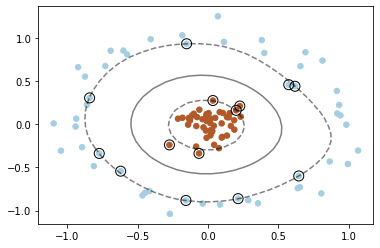

[[-0.23682767 -0.43091765 -0.47261804 -0.41979082 -1.         -1.
  -0.40839676 -0.3637296  -0.02838458  1.          1.          1.
   0.68811756  0.67254755]]


In [21]:
# plot X, y together with kernel-svm margin and decision boundary
X, y = make_circles(100, factor=.1, noise=.1)
clf = svm.SVC(kernel='rbf')
clf.fit(X, y)
plot_svm(X,y,clf)
# predict new datapoint using decision boundary
clf.decision_function([[0,0]])
clf.decision_function([[-1,-1]])
print(clf.dual_coef_)

### Note
---
 - **Primal** is infeasible, when number $d$ of features is very large (Optimization of a vector $(w, b)$ in $\mathbb{R}^{d+1}$ subject to $N$ constraints.)
 - **Dual** is infeasible, when N is large (e.g. 1million data points)
 
What if both $N$ and $d$ are large?
 - Random Features [https://people.eecs.berkeley.edu/~brecht/papers/07.rah.rec.nips.pdf]
 - Neural networks to learn an efficient feature map with size << d

## So far:
--- 
- Hard Margin SVM  ==> Assumes linearly seperable data
- Hard Margin SVM + Kernel Trick ==> Assumes (non-linearly) seperable data

What is missing? 

SVM for data that is **NOT** seperable given known kernels

## 3. Soft Margin SVM

To account for cases where the data is not seperable, we introduce slack variables $\xi_i$, that let points fall into the margin, at the cost of a penalty with factor $C$.

- $\underset{w,b,\xi}{min} \frac{1}{2}\lVert w \rVert^2 + C \sum_i \xi_i$ subject to the constraints

$y_i(w^T\Phi(x_i) + b) \geq 1 - \xi_i$ and $\xi_i \geq 0$.

This is the final form of the SVM Primal objective function that you find online. Note that we can use its Dual formulation as well, for example to apply the kernel trick as discussed.

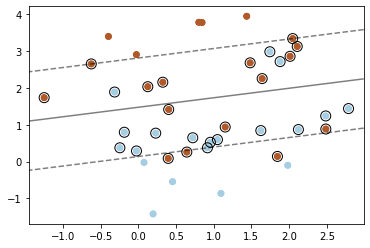

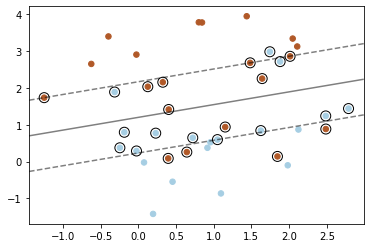

In [27]:
# Soft Margin SVM
X, y = make_blobs(n_samples = 40, centers=[[1,1],[1,2]], n_features=2, random_state=3)
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Paired)

clf = svm.SVC(kernel='linear', C=.1)
clf.fit(X, y)
plot_svm(X, y ,clf)

clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)
plot_svm(X, y ,clf)

Can be used for multiclass classification as well!

### One vs rest:
---
<img src="img\ova.jpeg" alt="Drawing" style="width: 1024px;"/>
[Image credit: http://imag.pub.ro/ro/cursuri/ISIA/lab/res-V/ova.jpeg]

In [29]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

X = np.array([
    [10, 10],
    [8, 10],
    [-5, 5.5],
    [-5.4, 5.5],
    [-20, -20],
    [-15, -20]])
y = np.array([0, 0, 1, 1, 2, 2])
clf = OneVsRestClassifier(SVC()).fit(X,y)
clf.predict([[-19, -20], [9, 9], [-5, 5]])

array([2, 0, 1])

note for the following slide on nystrom
https://scikit-learn.org/stable/modules/kernel_approximation.html#nystroem-kernel-approx
classes in this submodule allow to approximate the embedding , thereby working explicitly with the representations , which obviates the need to apply the kernel or store training examples making it scale better with the number of samples


## Final note on SVM performance
---
From https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html:

>The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC or SGDClassifier instead, possibly after a Nystroem transformer.

If your dataset is large, you can also try to map your features to a new space using K-means clustering, and learn a linear model on those new mapped features. [c.f. http://fastml.com/the-secret-of-the-big-guys/]

Decision trees rectify the input space.
Trains simple (e.g. constant) model for each rectangle by solving
an optimization problem over the feature index j, and threshold value s.
$\underset{j,s}{min} \sum_{x_i\in\mathbb{R_1}} (y_i - c_1)^2$

## 4. Random Forests

Out of 179 classifiers, tested on 121 datasets, Random Forests performed the best.

[c.f.
https://www.jmlr.org/papers/volume15/delgado14a/delgado14a.pdf]

> "The classifiers most likely to be the bests are the random forest(RF)versions, the best of which (implemented in R and accessed via caret) achieves 94.1% ofthe maximum accuracy overcoming 90% in the 84.3% of the data sets.  However, the difference is not statistically significant with the second best, the SVM with Gaussian kernel implemented in C using LibSVM, which achieves 92.3% of the maximum accuracy."

**But SVMs do not scale as well with large datasets.**

Given a labelled dataset $D = \{(x_1,y_1),...,(x_N,y_N)\}$, repeatedly select a random sample with replacement and fit a tree to that sample.

The prediction of a new datapoint $x$ is given by

$\frac{1}{B} \sum^B_{b=1} f_b(x)$

This procedure, i.e. training an ensemble of models on bootstrapped datasets, is called `Bagging`.

The algorithm of Random forests applies bagging to decision trees and uses an additional trick: The tree learning is modified, such that each tree is trained only on a subset of the features.

The number p of features to use in each split, together with B, are the hyperparameters of the Random Forest algorithm

todo: COPY FROM ONE OF THE THREE BOOKS THE PSEUDOCODE ALGO

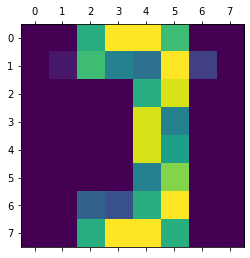

In [8]:
# load mnist
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

digits = load_digits()

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size=0.2)
plt.matshow(Xtrain[0].reshape(8,8))

In [9]:
# fit a RandomForest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(Xtrain, ytrain)
print(f'accuracy = {model.score(Xtest, ytest)}')

accuracy = 0.975


In [10]:
# draw a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, model.predict(Xtest))

array([[34,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0, 31,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 31,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1, 41]], dtype=int64)

In [33]:
# preview for the next lecture
np.argsort(model.feature_importances_)

array([ 0, 56, 39, 32, 24,  8, 40, 47, 31, 48, 16, 23,  7, 15, 55, 49,  1,
       57, 63, 14, 11, 17,  6, 41,  9,  4, 22, 59,  3, 25, 52, 12, 62, 46,
       37, 50, 35, 51,  5, 18, 45,  2, 53, 54, 34, 27, 60, 44, 29, 58, 38,
       19, 10, 61, 13, 30, 33, 20, 28, 36, 42, 43, 21, 26])

### When to avoid Random Forests:
<img src="img\rf.png" alt="Drawing" style="width: 1024px;"/>
[Image credit: Peter Ellis (http://freerangestats.info)]

### Be careful with Random Forests when having: 
- Time series
- Images 
- Graph data
These structures are typically not well-approximated by many rectangular partitions.

# The End - happy to see you in the exercise sessions!